# Lecture 6 / Lab 2 - Answering Weather Questions

* Announcements:
  * Quiz 1 results out after class
      * Some data type questions had multiple valid answers
  * Quiz 2 this weekend - take it before Monday's class!
  * Lab 1 Survey didn't have the open-ended feedback question. I added it and will accept any late survey submissions if you're willing to go back and give me feedback!
  * Lab 2 out today, due next Thursday 10pm.

* Goals:
  * Know how to make basic scatter plots to look at bivariate relationships of variables in a Pandas data frame
  * Know how to perform basic filtering by time and date.
  * Know how to create compound boolean masks using `&` and `|` (beware the precedence!)
  * Get started on Lab 2

In [1]:
def data_url(city_name):
    base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci141_21s/fp/data/"
    return base_url + city_name + ".csv"


Game Plan:
* Load bellingham's weather data.
* Clean and convert `HourlyDryBulbTemperature` and `HourlyPrecipitation` to `float`s
* Convert `DATE` from object/string to a `datetime`
* Extract only the observations from February
* Make histograms of the above variables individually
* Make a scatter plot that shows the relationship between the above variables.

In [14]:
import pandas as pd

def data_url(city_name):
    base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci141_21s/fp/data/"
    return base_url + city_name + ".csv"

bham = pd.read_csv(data_url("WA_Bellingham"), low_memory=False)

# Convert HourlyDryBulbTemperature to float, stripping 's' off the end where applicable
temps = bham["HourlyDryBulbTemperature"].str.rstrip("s").astype(float)
bham["HourlyDryBulbTemperature"] = temps

# Convert HourlyPrecipitation to float, replacing "T" with 0 and stripping "s"
precips = bham["HourlyPrecipitation"].str.replace("T", "0").str.rstrip("s")
bham["HourlyPrecipitation"] = precips.astype(float)
bham[["DATE", "HourlyDryBulbTemperature", "HourlyPrecipitation"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11348 entries, 0 to 11347
Data columns (total 3 columns):
DATE                        11348 non-null object
HourlyDryBulbTemperature    10982 non-null float64
HourlyPrecipitation         9296 non-null float64
dtypes: float64(2), object(1)
memory usage: 266.0+ KB


* Convert `DATE` from object/string to a `datetime`

In [16]:
bham["DATE"] = pd.to_datetime(bham["DATE"])
bham[["DATE", "HourlyDryBulbTemperature", "HourlyPrecipitation"]]

DATE  HourlyDryBulbTemperature  HourlyPrecipitation
0     2020-01-01 00:14:00                      53.0                  NaN
1     2020-01-01 00:24:00                      53.0                  NaN
2     2020-01-01 00:53:00                      53.0                 0.00
3     2020-01-01 01:53:00                      52.0                 0.00
4     2020-01-01 02:53:00                      52.0                 0.00
5     2020-01-01 03:53:00                      52.0                 0.00
6     2020-01-01 04:53:00                      51.0                  NaN
7     2020-01-01 05:53:00                      50.0                  NaN
8     2020-01-01 06:53:00                      49.0                 0.00
9     2020-01-01 07:53:00                      49.0                 0.00
10    2020-01-01 08:53:00                      49.0                 0.00
11    2020-01-01 09:53:00                      50.0                 0.00
12    2020-01-01 10:53:00                      50.0                 0.00
13    2020-01-01 11:53:00                      51.0                 0.00
14    2020-01-01 12:53:00                      50.0                 0.00
15    2020-01-01 13:53:00                      52.0                  NaN
16    2020-01-01 14:53:00                      50.0                 0.00
17    2020-01-01 15:53:00                      50.0                 0.00
18    2020-01-01 16:53:00                      50.0                 0.00
19    2020-01-01 17:53:00                      49.0                 0.00
20    2020-01-01 18:53:00                      48.0                 0.00
21    2020-01-01 19:53:00                      46.0                 0.00
22    2020-01-01 20:53:00                      45.0                 0.00
23    2020-01-01 21:27:00                      45.0                  NaN
24    2020-01-01 21:53:00                      45.0                 0.00
25    2020-01-01 22:53:00                      44.0                 0.00
26    2020-01-01 23:53:00                      44.0                 0.00
27    2020-01-01 23:59:00                       NaN                  NaN
28    2020-01-02 00:53:00                      44.0                 0.00
29    2020-01-02 01:53:00                      44.0                 0.00
...                   ...                       ...                  ...
11318 2020-12-31 06:53:00                      41.0                 0.02
11319 2020-12-31 07:10:00                      41.0                 0.00
11320 2020-12-31 07:53:00                      41.0                 0.00
11321 2020-12-31 08:53:00                      41.0                 0.00
11322 2020-12-31 09:18:00                      42.0                  NaN
11323 2020-12-31 09:39:00                      42.0                  NaN
11324 2020-12-31 09:53:00                      42.0                 0.00
11325 2020-12-31 10:53:00                      43.0                 0.00
11326 2020-12-31 11:53:00                      43.0                 0.00
11327 2020-12-31 12:53:00                      44.0                 0.00
11328 2020-12-31 13:53:00                      45.0                 0.00
11329 2020-12-31 14:53:00                      45.0                  NaN
11330 2020-12-31 15:53:00                      45.0                 0.01
11331 2020-12-31 16:53:00                      44.0                 0.01
11332 2020-12-31 16:56:00                      44.0                  NaN
11333 2020-12-31 17:15:00                      45.0                 0.00
11334 2020-12-31 17:38:00                      45.0                 0.00
11335 2020-12-31 17:53:00                      45.0                 0.01
11336 2020-12-31 17:55:00                      45.0                 0.00
11337 2020-12-31 18:02:00                      45.0                 0.00
11338 2020-12-31 18:09:00                      45.0                 0.00
11339 2020-12-31 18:16:00                      45.0                 0.00
11340 2020-12-31 18:43:00                      45.0                 0.00
11341 

* Extract only the observations from February

In [20]:
mask = (bham['DATE'] > "2020-02-01") & (bham['DATE'] < "2020-03-01")
feb = bham[mask]

* Make histograms of the above variables individually

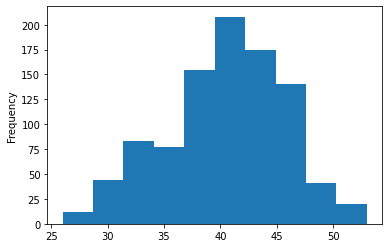

In [21]:
feb["HourlyDryBulbTemperature"].plot.hist()

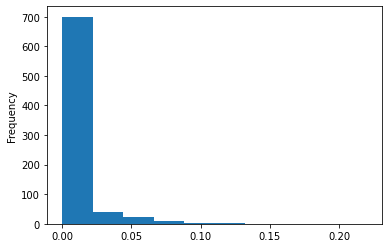

In [22]:
feb["HourlyPrecipitation"].plot.hist()

* Make a scatter plot that shows the relationship between the above variables.

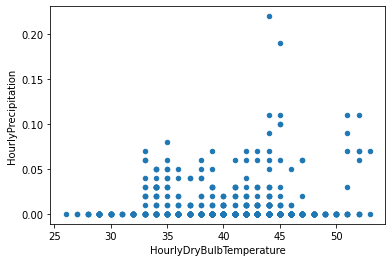

In [23]:
feb.plot.scatter("HourlyDryBulbTemperature", "HourlyPrecipitation")